# For data manipulation parts and codes use link:

[ML BTK-1 Colab](https://colab.research.google.com/drive/1R8bJJypAHdpol59H9bgMTDRWCKzTgNoC#scrollTo=UIl8pb7dUvGS)

Next:
SVR Algorithm
[SVR Colab](https://colab.research.google.com/drive/1QWtItyz5mVSwWiGtQdMzI6OD3_JwuGzO#scrollTo=ZsEukbjNIUvm)

## **PREDICTION ALGORITHMS / importing libraries**

We will use classification for categorical data and prediction for numerical data.

Forecasting and prediction are different. We can use prediction to predict past values as well.

In [ ]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving maaslar.txt to maaslar.txt


# SIMPLE LINEAR REGRESSION

We will try to find line of best fit using *y = ax + b*.

example for simple linear regression:

*sales = a + b (months) + e*


In [ ]:
data = pd.read_csv(io.BytesIO(uploaded['satislar.txt']))
print("Done")

Done


In [ ]:
months = data[['Aylar']]
sales = data[['Satislar']]
print(sales)
# or we can use instead of data[['Satislar']]
# sales2 = data.iloc[:,1:2].values
# here months is independent sales is dependent variable.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(months, sales, 
                                                    test_size=0.33,
                                                    random_state=0)

# standardize data

# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(x_train)
# X_test = sc.fit_transform(x_test)

# Y_train = sc.fit_transform(y_train)
# Y_test = sc.fit_transform(y_test)


KeyError: ignored

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
predict = lr.predict(x_test)

Make graph of datas using matplotlib.pyplot

In [ ]:
# first sort values by index
x_train = x_train.sort_index()
y_train = y_train.sort_index()

plt.plot(x_train, y_train)
plt.plot(x_test, lr.predict(x_test))

plt.title("Sale Prediction")
plt.xlabel("Months")
plt.ylabel("Sales")

# MULTIPLE LINEAR REGRESSION

*y = (beta0) + (beta1)(x1) + (beta2)(x2) + (beta3)(x3) + epsilon*

example for multiple linear regression:

*height = a + b(weight) + c(age) + d(foot size) + e*


---

> Be aware of dummy variable trap situation. Some algorithms effect much than others.

> It's happen when we change categorical data to numerical like one hat encoding.

---

p-value says that: 

How many example if I find that I can disprove null hypothesis. (p generally taken as 0.05 (%5))

H0 is null, H1 is alternative hypothesis. null hypothesis possibility of being wrong increases when p gets smaller. At the same time, possibility of being right of H1 increases. Vice versa, when p gets bigger, null hypothesis is more likely to be true.


In below code first we prepare data.

In [ ]:
data = pd.read_csv(io.BytesIO(uploaded['veriler.txt']))
print("Done")

In [ ]:
# encode sex column to 1s and 0s
c = data.iloc[:,-1:].values

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
c[:,-1] = le.fit_transform(data.iloc[:,-1])

ohe = preprocessing.OneHotEncoder()
c = ohe.fit_transform(c).toarray()

# below code is from before little modified
country = data.iloc[:,0:1].values

le = preprocessing.LabelEncoder()
country[:,0] = le.fit_transform(data.iloc[:,0])

ohe = preprocessing.OneHotEncoder()
country = ohe.fit_transform(country).toarray()



age = data.iloc[:,1:4].values

dataLength = len(data)

result = pd.DataFrame(data=country, index = range(dataLength),
                      columns = ['fr', 'tr', 'us'])

result2 = pd.DataFrame(data = age, index = range(dataLength),
                       columns=['boy', 'kilo', 'yas'])
sex = data.iloc[:,-1].values
result3 = pd.DataFrame(data = c[:,:1], index = range(dataLength),
                       columns=['cinsiyet'])


s = pd.concat([result, result2], axis=1) 
s2 = pd.concat([s, result3], axis=1)
print(s2)
print(s)
print(result3)
# split sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(s, result3, 
                                                    test_size=0.33,
                                                    random_state=0)

     fr   tr   us  boy  kilo  yas  cinsiyet
0   0.0  1.0  0.0  130    30   10       1.0
1   0.0  1.0  0.0  125    36   11       1.0
2   0.0  1.0  0.0  135    34   10       0.0
3   0.0  1.0  0.0  133    30    9       0.0
4   0.0  1.0  0.0  129    38   12       1.0
5   0.0  1.0  0.0  180    90   30       1.0
6   0.0  1.0  0.0  190    80   25       1.0
7   0.0  1.0  0.0  175    90   35       1.0
8   0.0  1.0  0.0  177    60   22       0.0
9   0.0  0.0  1.0  185   105   33       1.0
10  0.0  0.0  1.0  165    55   27       0.0
11  0.0  0.0  1.0  155    50   44       0.0
12  0.0  0.0  1.0  160    58   39       0.0
13  0.0  0.0  1.0  162    59   41       0.0
14  0.0  0.0  1.0  167    62   55       0.0
15  1.0  0.0  0.0  174    70   47       1.0
16  1.0  0.0  0.0  193    90   23       1.0
17  1.0  0.0  0.0  187    80   27       1.0
18  1.0  0.0  0.0  183    88   28       1.0
19  1.0  0.0  0.0  159    40   29       0.0
20  1.0  0.0  0.0  164    66   32       0.0
21  1.0  0.0  0.0  166    56   4

Train ML model using data and predict sex.

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_predict = regressor.predict(x_test)
print(y_predict)  # compare with y_test
print("-----Real Results-----")
print(y_test)

[[ 0.98720204]
 [-0.12036863]
 [ 0.05009703]
 [ 0.07137418]
 [ 0.72473935]
 [ 0.64615044]
 [-0.03567453]
 [ 0.32612171]]
-----Real Results-----
    cinsiyet
20       0.0
10       0.0
14       0.0
13       0.0
1        1.0
21       0.0
11       0.0
19       0.0


Predict height.

In [ ]:
# first prepare data:
height = s2.iloc[:,3:4].values

left_side_of_height_column = s2.iloc[:,:3]
right_side_of_height_column = s2.iloc[:,4:]

without_height = pd.concat([left_side_of_height_column, right_side_of_height_column],
                           axis = 1)

x_train, x_test, y_train, y_test = train_test_split(without_height, height, 
                                                    test_size=0.33,
                                                    random_state=0)

r2 = LinearRegression()
r2.fit(x_train, y_train)

y_predict = r2.predict(x_test)
# compare with y_test
print(y_predict)
print("-----Real Results-----")
print(y_test)

     fr   tr   us  kilo  yas  cinsiyet
0   0.0  1.0  0.0    30   10       1.0
1   0.0  1.0  0.0    36   11       1.0
2   0.0  1.0  0.0    34   10       0.0
3   0.0  1.0  0.0    30    9       0.0
4   0.0  1.0  0.0    38   12       1.0
5   0.0  1.0  0.0    90   30       1.0
6   0.0  1.0  0.0    80   25       1.0
7   0.0  1.0  0.0    90   35       1.0
8   0.0  1.0  0.0    60   22       0.0
9   0.0  0.0  1.0   105   33       1.0
10  0.0  0.0  1.0    55   27       0.0
11  0.0  0.0  1.0    50   44       0.0
12  0.0  0.0  1.0    58   39       0.0
13  0.0  0.0  1.0    59   41       0.0
14  0.0  0.0  1.0    62   55       0.0
15  1.0  0.0  0.0    70   47       1.0
16  1.0  0.0  0.0    90   23       1.0
17  1.0  0.0  0.0    80   27       1.0
18  1.0  0.0  0.0    88   28       1.0
19  1.0  0.0  0.0    40   29       0.0
20  1.0  0.0  0.0    66   32       0.0
21  1.0  0.0  0.0    56   42       0.0
[[182.26638686]
 [152.87161474]
 [162.79386375]
 [158.30668577]
 [130.82888952]
 [173.96138408]
 [150.1

# Backward Elimination

In before section we used all data to predict height for example but maybe we don't need all data. In this section we will use backward elimination to erase some data.

Calculating p-value to eveluate success of model prediction. (continue using veriler.txt data)

In [ ]:
# we will test values one by one by taking out and eveluating scores
# will take out highest p-value then continue for next highest

# IN OUR MODEL, we don't have constant beta0 variable. We are trying to add
# that variable now. First we'll add a column has 22 ones in it.

import statsmodels.api as sm

beta0 = np.append(arr = np.ones((22,1)).astype(int), values=data, axis=1)
# print(beta0)

# X_l is array containing our independent variable, height is dependent var
X_l = without_height.iloc[:,[0,1,2,3,4,5]].values
X_l = np.array(X_l, dtype=float)

# statistical results:
model = sm.OLS(height, X_l).fit()
print(model.summary())

# we saw x5 has highest p value we delete 4th column (x5 => 4th column)it
X_l = without_height.iloc[:,[0,1,2,3,5]].values
X_l = np.array(X_l, dtype=float)
model = sm.OLS(height, X_l).fit()
print(model.summary())

# Polynomial Regression

*y = (beta0) + (beta1)(x) + (beta2)(x^2) + ... + (betah)(x^h) + epsilon*


or it can be **multi-varient**

*y = (beta0) + (beta1)(x1) + (beta2)(x2) + (beta11)(x1^2) + (beta22)(x2^2) + (beta12)(x1)(x2) + epsilon*

In [ ]:
data = pd.read_csv(io.BytesIO(uploaded['maaslar.txt']))
print(data)

              unvan  Egitim Seviyesi   maas
0             Cayci                1   2250
1          Sekreter                2   2500
2  Uzman Yardimcisi                3   3000
3             Uzman                4   4000
4  Proje Yoneticisi                5   5500
5               Sef                6   7500
6             Mudur                7  10000
7          Direktor                8  15000
8           C-level                9  25000
9               CEO               10  50000


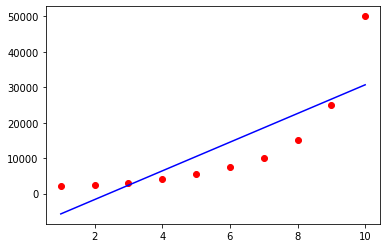

In [ ]:
# import data and linear regression
x = data.iloc[:,1:2]
y = data.iloc[:,2:]
# convert to numpy array
X = x.values
Y = y.values

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, Y)

plt.scatter(X, Y, color='red')
plt.plot(x, lin_reg.predict(X), color='blue')
plt.show()

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


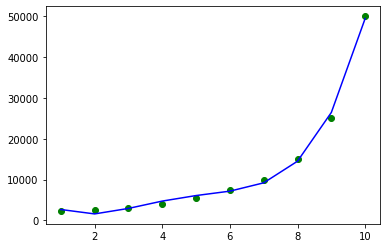

In [ ]:
# Polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(X)
print(x_poly)

lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly, y)
plt.scatter(X,Y, color='green')
plt.plot(X, lin_reg2.predict(poly_reg.fit_transform(X)), color='blue')

In [ ]:
# Predict Unknown Values

# for linear regression
print(lin_reg.predict([[11]]))
print(lin_reg.predict([[6.6]]))

# for poly reg
print(lin_reg2.predict(poly_reg.fit_transform([[11]])))
print(lin_reg2.predict(poly_reg.fit_transform([[6.6]])))


[[34716.66666667]]
[[16923.33333333]]
[[89041.66666669]]
[[8146.9948718]]


# Clear Codes 